# Bank Telemarketing Prediction

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

The classification goal is to predict if the client will subscribe a term deposit (variable y).

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

# Function for displaying all columns
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)

In [2]:
df = pd.read_csv('data/bank-full.csv', sep=';')
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Inspecting and Encoding Variables

no     39922
yes     5289
Name: y, dtype: int64


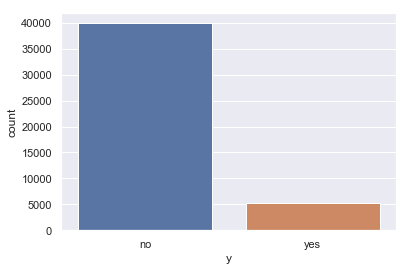

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x="y", data=df);
print(df.y.value_counts())

As we can see the target class is highly unbalanced and we need to take this into account when fitting algorithms. This can be dealt either by sampling or stratifying the data when it is split into train-validation-test sets.

In [7]:
# Checking value counts of binary variables
print(df.default.value_counts())
print(df.housing.value_counts())
print(df.loan.value_counts())
print(df.y.value_counts())

no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
no     39922
yes     5289
Name: y, dtype: int64


In [8]:
# Replacing binary variables no and yes with 0 and 1
df.replace({'no':0, 'yes':1}, inplace=True)

print(df.default.value_counts())
print(df.housing.value_counts())
print(df.loan.value_counts())
print(df.y.value_counts())

0    44396
1      815
Name: default, dtype: int64
1    25130
0    20081
Name: housing, dtype: int64
0    37967
1     7244
Name: loan, dtype: int64
0    39922
1     5289
Name: y, dtype: int64


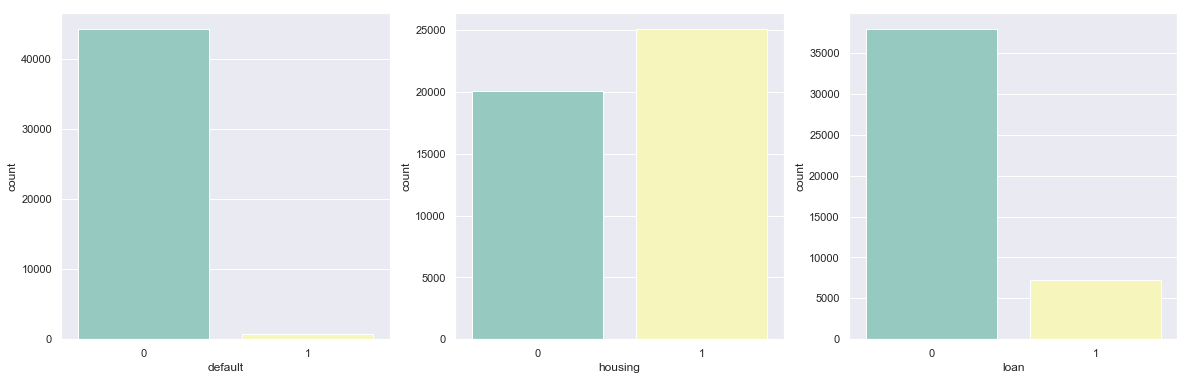

In [9]:
# Binary variable distributions
binary = ['default', 'housing', 'loan']

plt.figure(figsize=(20,6))
for i in range(1, 4):
    plt.subplot(1, 3, i)
    sns.countplot(x=binary[i-1], data=df, palette="Set3")
plt.show()

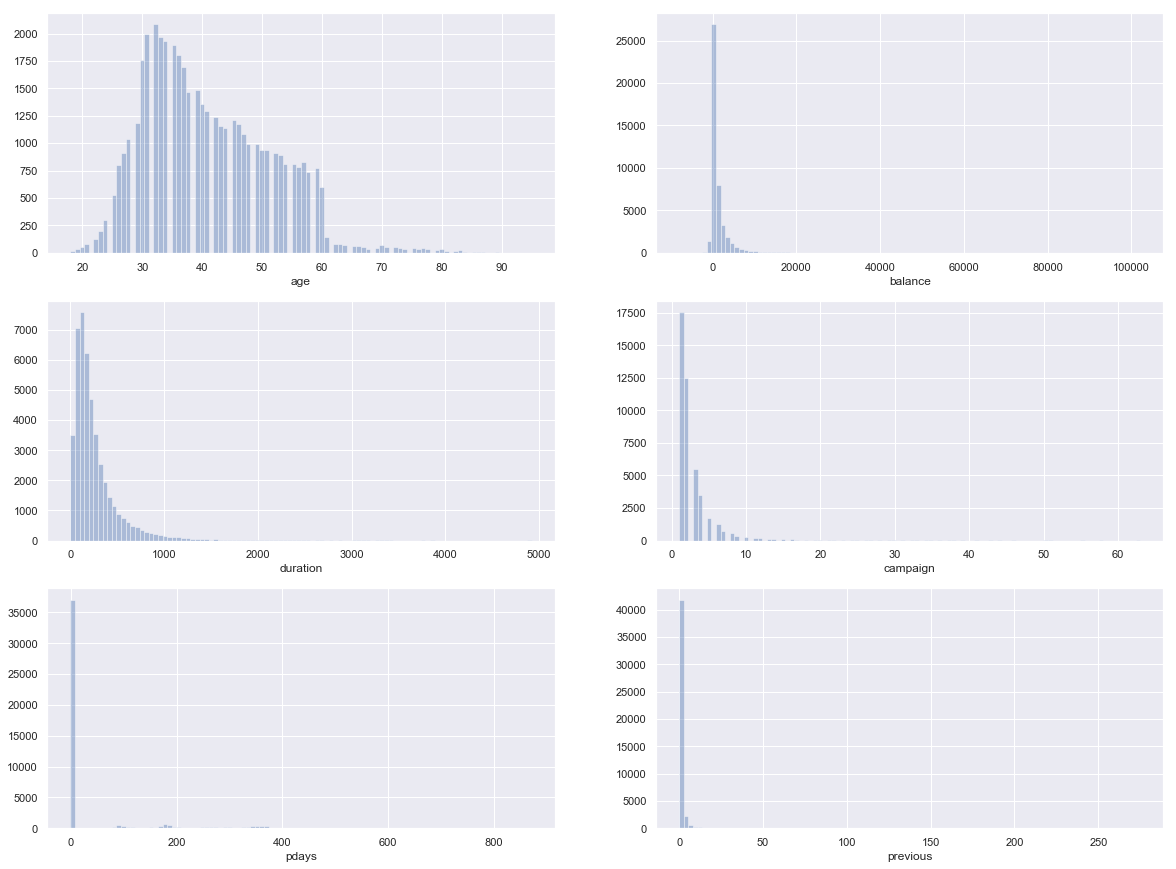

In [14]:
# Continuous feature distributions
continuous = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(20, 15))
for i in range(1, 7):
    plt.subplot(3, 2, i)
    sns.distplot(df[continuous[i-1]], bins=100, kde=False)
plt.show()

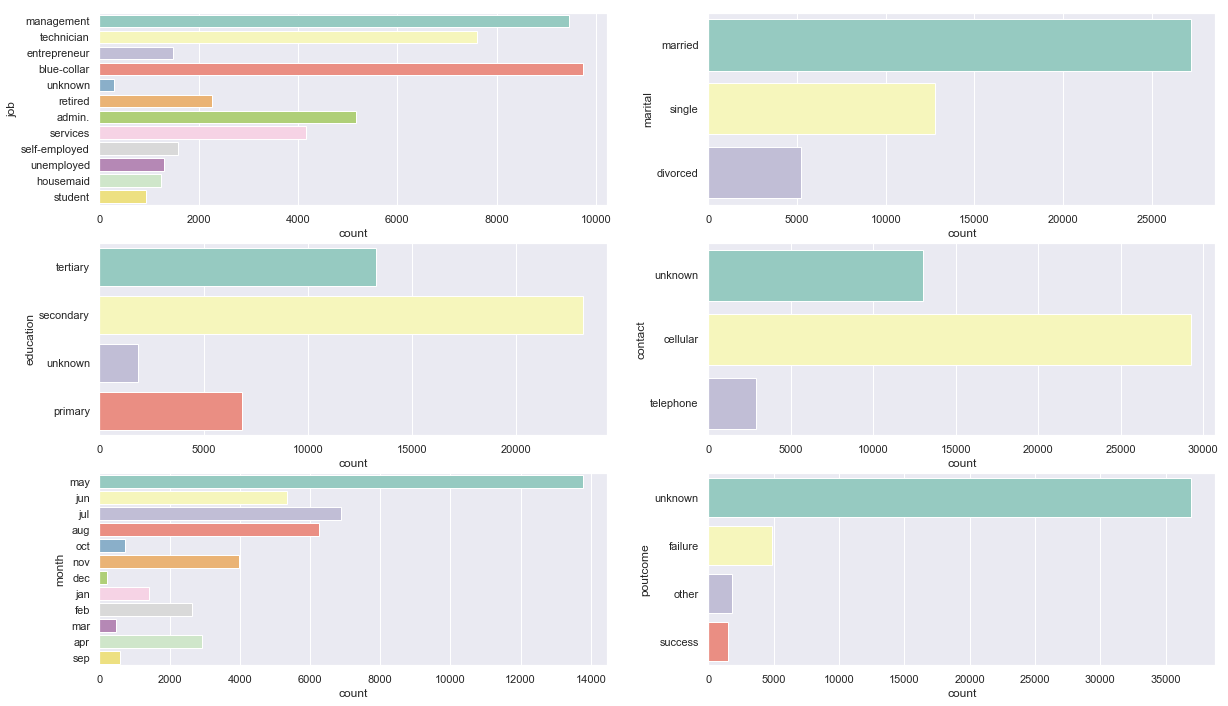

In [12]:
# # Categorical feature distributions
nominal = (df.dtypes == 'object')
nominal_cols = nominal[nominal].index

plt.figure(figsize=(20,12))
for i in range(1, 7):
    plt.subplot(3, 2, i)
    sns.countplot(y=nominal_cols[i-1], data=df, palette="Set3")
plt.show()

In [15]:
# Getting dummy variables of all nominal variables
df = pd.get_dummies(df, columns = nominal_cols)
print(df.shape)

(45211, 49)


In [16]:
display_all(df.head(10).transpose())

,0,1,2,3,4,5,6,7,8,9
age,58,44,33,47,33,35,28,42,58,43
default,0,0,0,0,0,0,0,1,0,0
balance,2143,29,2,1506,1,231,447,2,121,593
housing,1,1,1,1,0,1,1,1,1,1
loan,0,0,1,0,0,0,1,0,0,0
day,5,5,5,5,5,5,5,5,5,5
duration,261,151,76,92,198,139,217,380,50,55
campaign,1,1,1,1,1,1,1,1,1,1
pdays,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
previous,0,0,0,0,0,0,0,0,0,0


Encoding nominal (categorical) variables with numerical values turned 17 variables into 49 variables.

In [18]:
# Writing processed df to csv
df.to_csv('data/full-preprocessed.csv', index=False)

## Train-Validation-Test Split

Splitting data into following sets: test (70%), validation (15%) and test (15%)

In [48]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/full-preprocessed.csv')
display_all(df.head(10).transpose())

,0,1,2,3,4,5,6,7,8,9
age,58,44,33,47,33,35,28,42,58,43
default,0,0,0,0,0,0,0,1,0,0
balance,2143,29,2,1506,1,231,447,2,121,593
housing,1,1,1,1,0,1,1,1,1,1
loan,0,0,1,0,0,0,1,0,0,0
day,5,5,5,5,5,5,5,5,5,5
duration,261,151,76,92,198,139,217,380,50,55
campaign,1,1,1,1,1,1,1,1,1,1
pdays,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
previous,0,0,0,0,0,0,0,0,0,0


In [49]:
# Splitting dataframe into target variable y and features X
y = df.pop('y')
X = df
print(X.shape, y.shape)

(45211, 48) (45211,)


In [50]:
# Splitting the original set twice to get train, validation and test sets
trainX, tempX, trainY, tempY = train_test_split(X, y, test_size=0.3, random_state=42)

validX, testX, validY, testY = train_test_split(tempX, tempY, test_size=0.5, random_state=42)

print(trainX.shape, trainY.shape, validX.shape, validY.shape, testX.shape, testY.shape)

(31647, 48) (31647,) (6782, 48) (6782,) (6782, 48) (6782,)


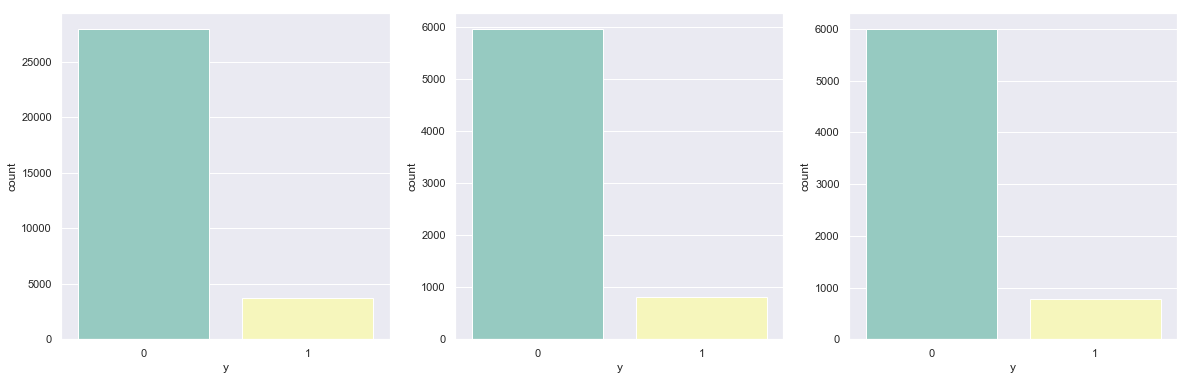

In [51]:
# Checking that target variables are equally distributed in each set
sets = [trainY, validY, testY]

plt.figure(figsize=(20,6))
for i in range(1, 4):
    plt.subplot(1, 3, i)
    sns.countplot(x=sets[i-1], data=df, palette="Set3")
plt.show()

In [58]:
# Writing each set to their own files
trainX.to_csv('data/trainX.csv', index=False)
trainY.to_csv('data/trainY.csv', index=False, header=['y'])
validX.to_csv('data/validX.csv', index=False)
validY.to_csv('data/validY.csv', index=False, header=['y'])
testX.to_csv('data/testX.csv', index=False)
testY.to_csv('data/testY.csv', index=False, header=['y'])

## Oversampled Dataset